In [96]:
import pandas as pd
import numpy as np

In [97]:
dt = pd.read_excel('realstate_dataset.xlsx')

In [98]:
dt.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [99]:
dt.shape

(414, 8)

In [100]:
x=dt.iloc[:,1:7]
y=dt.iloc[:,7:8]

In [101]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [102]:
dt.isnull().any()

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X3 distance to the nearest MRT station'>

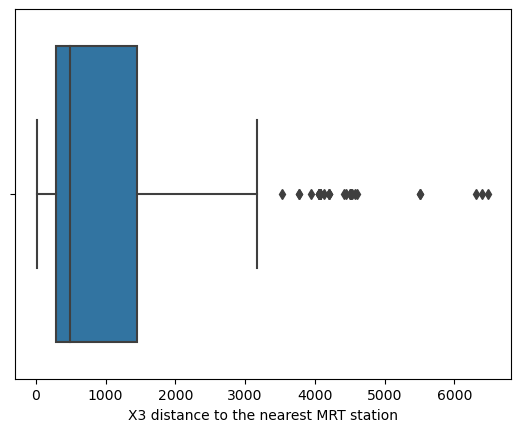

In [103]:
import seaborn as sns
sns.boxplot(dt['X3 distance to the nearest MRT station'])

In [104]:
lw=dt['X3 distance to the nearest MRT station'].quantile(0.05)
up=dt['X3 distance to the nearest MRT station'].quantile(0.95)
dt=(dt['X3 distance to the nearest MRT station'] >lw) & (dt['X3 distance to the nearest MRT station'] < up)

In [105]:
dt.describe()

count      414
unique       2
top       True
freq       367
Name: X3 distance to the nearest MRT station, dtype: object

In [106]:
x

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


# Multi Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr = LinearRegression()

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [111]:
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
y_pred=lr.predict(x_test)

In [113]:
from sklearn.metrics import r2_score


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

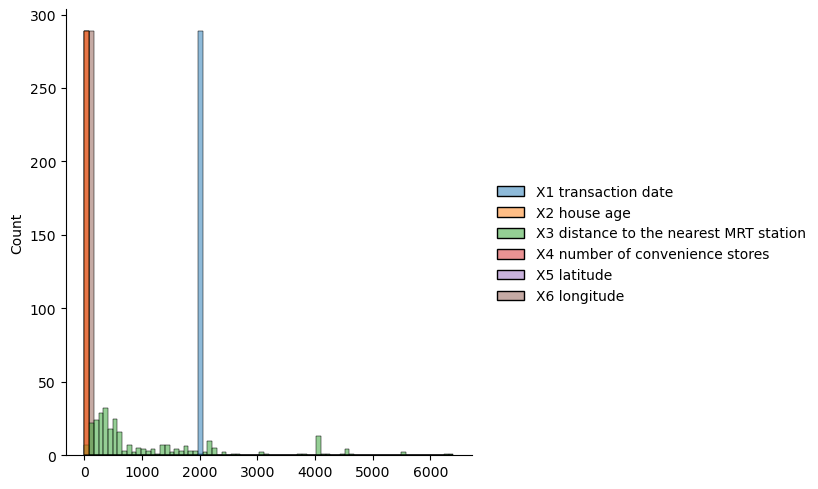

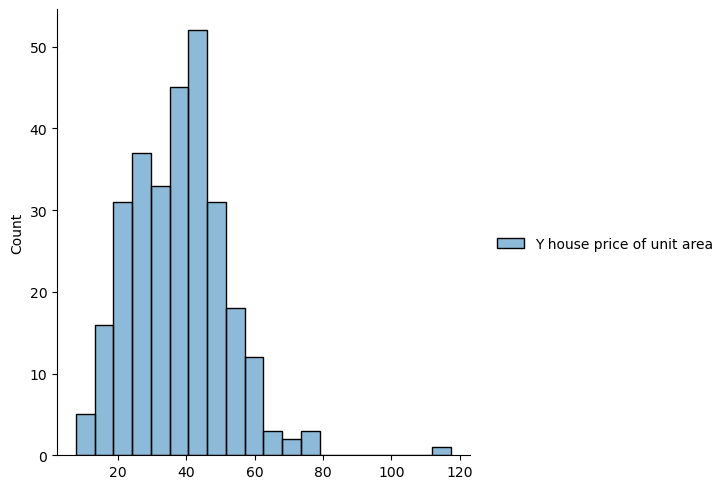

In [115]:
sns.displot(x_train)
sns.displot(y_train)

In [116]:
ac=r2_score(y_test,y_pred)

In [117]:
ac

0.6483053449574828

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [120]:
import pickle
with open('scale.pkl','wb') as f:
    pickle.dump(sc,f)


# DECISION TREE

In [121]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [122]:
dtr = DecisionTreeRegressor(random_state=40)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=40)

In [123]:
y_pred=dtr.predict(x_test)

In [124]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [125]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [126]:
ac

0.6228546701807869

In [127]:
rm

5.479518072289156

In [128]:
ms

64.2862048192771

# Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [130]:
rf=RandomForestRegressor(n_estimators=20,random_state=80)
rf.fit(x_train,y_train)

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13912\1814452946.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor(n_estimators=20, random_state=80)

In [131]:
y_pred=rf.predict(x_test)

In [132]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [133]:
ac

0.7823834718984976

In [134]:
rm

4.294445333333332

In [135]:
ms

31.404086267111108

# ADABOOST

In [136]:
from sklearn.ensemble import AdaBoostRegressor

In [137]:
adr = AdaBoostRegressor(n_estimators=10,learning_rate=1,random_state=20)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
adr.fit(x_train,y_train)

C:\Users\Roshan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=1, n_estimators=10, random_state=20)

In [138]:
y_pred=adr.predict(x_test)

In [139]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [140]:
ac

0.6429258588012791

In [141]:
rm

5.75077780934734

In [142]:
ms

49.361778748923804

# GradientBoost

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
gbr = GradientBoostingRegressor(max_depth=3,n_estimators=18,learning_rate=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [145]:
gbr.fit(x_train,y_train)

C:\Users\Roshan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=1, n_estimators=18)

In [146]:
y_pred=gbr.predict(x_test)

In [147]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [148]:
ac

0.6287885766425687

In [149]:
rm

5.910123491361106

In [150]:
ms

62.06491847752638

# XGBOOST

In [151]:
import xgboost

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=80)

In [153]:
xg = xgboost.XGBRegressor(objective='reg:linear',n_estimators=50,seed=23)

In [154]:
xg.fit(x_train,y_train)

[17:28:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [155]:
y_pred = xg.predict(x_test)

In [156]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [157]:
y=xg.predict(sc.fit_transform([[1980.90,7.0,6.8987,1,78.988,79.900]]))

In [158]:
ac

0.7340603736466449

In [159]:
rm

5.078987788005048

In [160]:
ms

48.92529851028508

In [161]:
import pickle

In [163]:
with open('price.pkl','wb') as f:
    pickle.dump(rf,f)